# Movie rating prediction

# importing the libaray

In [44]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# there is a problem with the dataset while loading dataset we have to specify the encoding of dataset

In [3]:
pip install chardet #installing chardet

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#installing'


In [4]:
#importing chardataset
import chardet
# Detect the encoding
with open("D:/code soft project material/IMDb Movies India.csv", 'rb') as f:
    result = chardet.detect(f.read())

In [5]:
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.7299861886043824, 'language': ''}


In [6]:
df = pd.read_csv("D:/code soft project material/IMDb Movies India.csv", encoding=result['encoding']) #reading the csv file 

# performing EDA

In [7]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [10]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [11]:
# filling missing value of duration time  

In [12]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [13]:

df = df.dropna(subset=['Duration'])

# Function to convert duration strings to minutes
def convert_to_minutes(duration_str):
    try:
        
        duration = int(duration_str.split(' ')[0])
        return duration
    except ValueError:
        return None

df['Duration'] = df['Duration'].apply(convert_to_minutes)


In [14]:
df['Duration']

1        109
2         90
3        110
4        105
5        147
        ... 
15493    115
15494    153
15503    125
15505    129
15508    130
Name: Duration, Length: 7240, dtype: int64

Mean Squared Error (MSE): 1.8182436016304904
Root Mean Squared Error (RMSE): 1.3484226346477912
R-squared (R^2): 0.0981216384029091


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7240 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7240 non-null   object 
 1   Year      7115 non-null   object 
 2   Duration  7240 non-null   int64  
 3   Genre     7053 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  7226 non-null   object 
 7   Actor 1   6976 non-null   object 
 8   Actor 2   6831 non-null   object 
 9   Actor 3   6691 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 622.2+ KB


In [16]:
#filling the null value of rating columns with the mean
mean=df['Rating'].mean()

In [17]:
df['Rating'].fillna(mean,inplace=True)

In [18]:
#filling the null value of votes columns 
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df.dropna(subset=['Votes'], inplace=True)

In [19]:
df['Year']

1        (2019)
3        (2019)
5        (1997)
8        (2012)
9        (2014)
          ...  
15492    (1975)
15493    (2015)
15503    (1989)
15505    (1999)
15508    (1998)
Name: Year, Length: 4482, dtype: object

In [20]:
#chaniging datatype of the year to int 
# Remove parentheses and convert 'Year' to int
df['Year'] = df['Year'].str.replace(r'[^0-9]', '', regex=True).astype(int)


In [21]:
df['Year']

1        2019
3        2019
5        1997
8        2012
9        2014
         ... 
15492    1975
15493    2015
15503    1989
15505    1999
15508    1998
Name: Year, Length: 4482, dtype: int32

In [22]:
df['Year']=df['Year'].astype('int')

In [23]:
mean=df['Year'].mean()
df['Year'].fillna(mean,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4482 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      4482 non-null   object 
 1   Year      4482 non-null   int32  
 2   Duration  4482 non-null   int64  
 3   Genre     4451 non-null   object 
 4   Rating    4482 non-null   float64
 5   Votes     4482 non-null   float64
 6   Director  4481 non-null   object 
 7   Actor 1   4407 non-null   object 
 8   Actor 2   4365 non-null   object 
 9   Actor 3   4320 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 367.7+ KB


In [25]:
df['Votes'] = df['Votes'].astype(int)  # Convert to integer if 'Votes' is meant to be integer.

In [26]:
#filling the null value of director columms
df['Director'].fillna('unknown',inplace=True)

In [27]:
#filling the null value of actor1 columms
df['Actor 1'].fillna('unknown',inplace=True)

In [28]:
#filling the null value of actor2 columms
df['Actor 2'].fillna('unknown',inplace=True)

In [29]:
#filling the null value of actor3 columms
df['Actor 3'].fillna('unknown',inplace=True)

In [30]:
#changining the datatype of Rating to float datatype
df['Rating']=df['Rating'].astype('float')

In [31]:
ndf=df['Genre'].dropna()

In [32]:
df.isnull().sum()

Name         0
Year         0
Duration     0
Genre       31
Rating       0
Votes        0
Director     0
Actor 1      0
Actor 2      0
Actor 3      0
dtype: int64

In [33]:
df['Genre']

1                            Drama
3                  Comedy, Romance
5           Comedy, Drama, Musical
8        Horror, Mystery, Thriller
9          Action, Crime, Thriller
                   ...            
15492    Action, Adventure, Comedy
15493                        Drama
15503         Action, Crime, Drama
15505                Action, Drama
15508                Action, Drama
Name: Genre, Length: 4482, dtype: object

In [34]:

df['Cleaned_Name'] = df['Name'].str.replace('[^a-zA-Z0-9\s]', '').str.lower()

df['Cleaned_Name']

C:\Users\btirk\AppData\Local\Temp\ipykernel_2932\3632440278.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned_Name'] = df['Name'].str.replace('[^a-zA-Z0-9\s]', '').str.lower()


1        gadhvi he thought he was gandhi
3                                 yaaram
5                      aur pyaar ho gaya
8                        a question mark
9                                andheri
                      ...               
15492                              zorro
15493                             zubaan
15503                    zulm ki zanjeer
15505                              zulmi
15508                         zulmositam
Name: Cleaned_Name, Length: 4482, dtype: object

In [35]:
# Split the genres and apply one-hot encoding
#df['Genre'] = df['Genre'].str.split(',')
#df = df.join(df['Genre'].str.join('|').str.get_dummies())

In [36]:
df['Genre']

1                            Drama
3                  Comedy, Romance
5           Comedy, Drama, Musical
8        Horror, Mystery, Thriller
9          Action, Crime, Thriller
                   ...            
15492    Action, Adventure, Comedy
15493                        Drama
15503         Action, Crime, Drama
15505                Action, Drama
15508                Action, Drama
Name: Genre, Length: 4482, dtype: object

In [37]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Cleaned_Name'],
      dtype='object')

In [38]:
#genre_counts = df[['Action', 'Comedy', 'Drama','Adventure','Biography','Crime','Family','Fantasy','History','Horror','Music','Musical','Mystery',' News','Romance','Sci-Fi','Sport','Thriller','War',' Western','Action','Adventure','Animation','Biography']].sum()


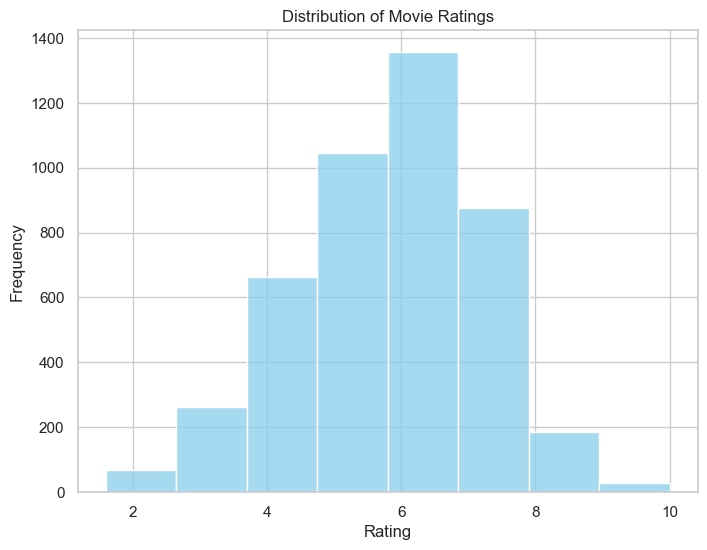

In [39]:
#plotting a histogram

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.histplot(data=df, x='Rating', bins=8,  color='skyblue',)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
#here we can conclude that average movies rating is around 6 or 6.5

C:\Users\btirk\AppData\Local\Temp\ipykernel_2932\2975651719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


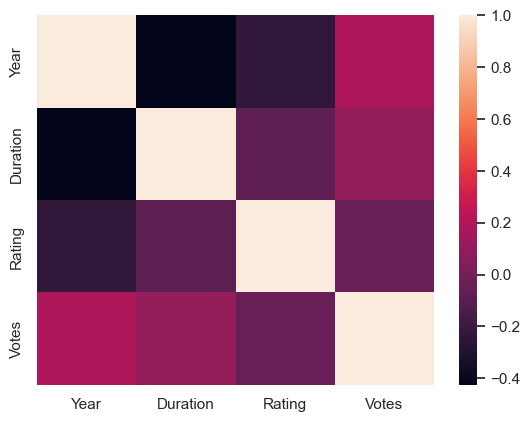

In [40]:
sns.heatmap(df.corr())
plt.show()

In [47]:
X = df[['Year', 'Duration', 'Votes']]  # Include relevant features
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R^2): {r2}')

Mean Squared Error (MSE): 1.8182436016304904
Root Mean Squared Error (RMSE): 1.3484226346477912
R-squared (R^2): 0.0981216384029091
